In [1]:
import tarfile
from six.moves import urllib

url = "https://drive.google.com/uc?export=download&id=1Fy1B4OElYBh3h7eAHIKKGP1TDBKcWCy3"
path = "housiing.tgz"

urllib.request.urlretrieve(url, path)
file = tarfile.open(path)
file.extractall()
file.close()

In [2]:
import pandas as pd
 
data = pd.read_csv("housing.csv")
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

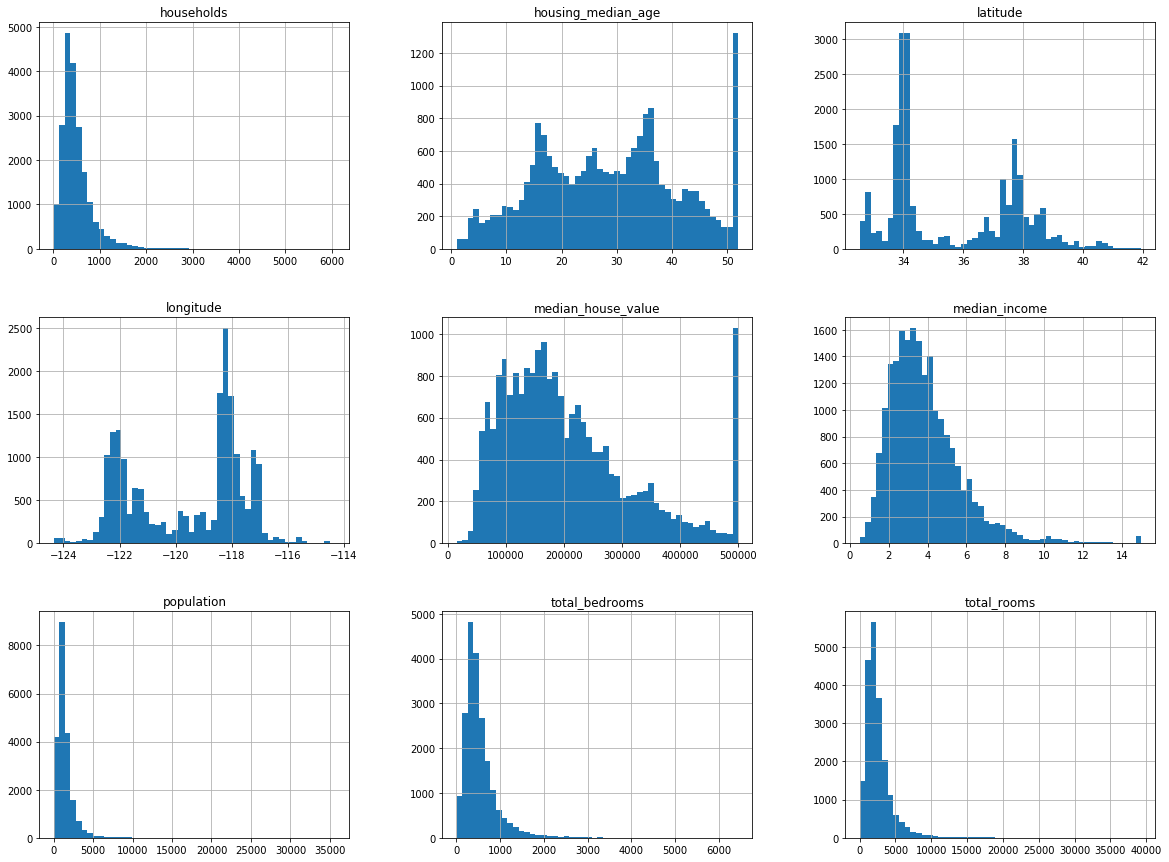

In [6]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

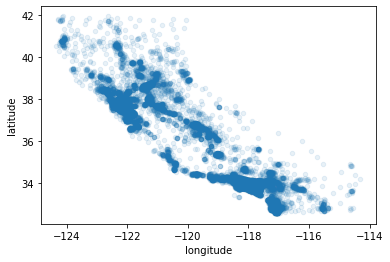

In [7]:
data.plot(kind="scatter" ,x="longitude", y="latitude", alpha=0.1)

In [8]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

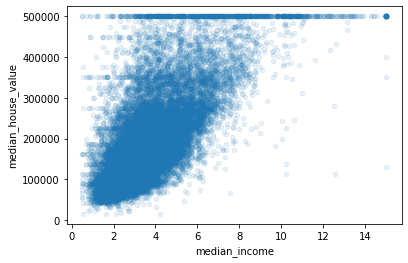

In [9]:
data.plot(kind="scatter",
         x="median_income",
         y="median_house_value",
         alpha=0.1)

In [10]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


In [11]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_rooms          20640 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20640 non-null  float64
 6   households           20640 non-null  float64
 7   median_income        20640 non-null  float64
 8   median_house_value   20640 non-null  float64
 9   ocean_proximity      20640 non-null  object 
 10  rooms_per_household  20640 non-null  float64
 11  bedrooms_per_room    20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
ocean = data[["ocean_proximity"]]
ocean = encoder.fit_transform(ocean) 

In [14]:
print(ocean.toarray())
print(encoder.categories_)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [15]:
ocean = pd.DataFrame(columns=encoder.categories_[0],
                    data=ocean.toarray())
ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [16]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


In [17]:
value = data[["median_house_value"]]
value

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [18]:
data.drop(["median_house_value", "ocean_proximity"], axis=1, inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892


In [19]:
data = pd.concat([data, ocean, value], axis=1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,0.0,0.0,0.0,1.0,0.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,0.0,0.0,0.0,1.0,0.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,0.0,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0,84700.0


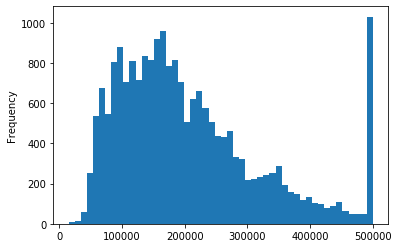

In [20]:
data["median_house_value"].plot(kind="hist", bins=50)

In [21]:
data["group"] = pd.cut(x=data["median_house_value"],
                      bins=[0, 100000, 200000, 300000, 400000, 500001],
                      labels=["group_1", "group_2", "group_3", "group_4", "group_5"])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0,452600.0,group_5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0,358500.0,group_4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,0.0,0.0,0.0,1.0,0.0,352100.0,group_4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,0.0,0.0,0.0,1.0,0.0,341300.0,group_4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,0.0,0.0,0.0,1.0,0.0,342200.0,group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0,78100.0,group_1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0,77100.0,group_1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0,92300.0,group_1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0,84700.0,group_1


In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                              test_size=0.2,
                              stratify=data["group"],
                              random_state=0)

In [23]:
train["group"].value_counts() / len(train) #피처간의 비율을 보기

group_2    0.400799
group_3    0.236131
group_1    0.177204
group_4    0.101381
group_5    0.084484
Name: group, dtype: float64

In [24]:
test["group"].value_counts() / len(test) 
#train데이터 비율과 test데이터 비율이 유사한 것 확인

group_2    0.400921
group_3    0.235950
group_1    0.177326
group_4    0.101260
group_5    0.084545
Name: group, dtype: float64

In [25]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,group
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,5.495177,0.193681,1.0,0.0,0.0,0.0,0.0,210200.0,group_3
5406,-118.44,34.03,30.0,1039.0,303.0,606.0,274.0,3.1250,3.791971,0.291627,1.0,0.0,0.0,0.0,0.0,343800.0,group_4
14033,-117.14,32.75,35.0,1391.0,329.0,726.0,317.0,2.6818,4.388013,0.236520,0.0,0.0,0.0,0.0,1.0,159400.0,group_2
2236,-119.80,36.86,7.0,6434.0,1201.0,2733.0,1045.0,3.7656,6.156938,0.186665,0.0,1.0,0.0,0.0,0.0,145000.0,group_2
1898,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,5.474950,0.222914,0.0,1.0,0.0,0.0,0.0,86700.0,group_1


In [26]:
train = train.drop("group", axis=1)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,5.495177,0.193681,1.0,0.0,0.0,0.0,0.0,210200.0
5406,-118.44,34.03,30.0,1039.0,303.0,606.0,274.0,3.1250,3.791971,0.291627,1.0,0.0,0.0,0.0,0.0,343800.0
14033,-117.14,32.75,35.0,1391.0,329.0,726.0,317.0,2.6818,4.388013,0.236520,0.0,0.0,0.0,0.0,1.0,159400.0
2236,-119.80,36.86,7.0,6434.0,1201.0,2733.0,1045.0,3.7656,6.156938,0.186665,0.0,1.0,0.0,0.0,0.0,145000.0
1898,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,5.474950,0.222914,0.0,1.0,0.0,0.0,0.0,86700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,-122.23,37.46,26.0,4670.0,1039.0,2103.0,933.0,4.4167,5.005359,0.222484,0.0,0.0,0.0,0.0,1.0,333800.0
12834,-121.44,38.69,24.0,3124.0,556.0,1512.0,555.0,3.1942,5.628829,0.177977,0.0,1.0,0.0,0.0,0.0,94900.0
8836,-118.37,34.08,28.0,4376.0,1202.0,1847.0,1128.0,2.6713,3.879433,0.274680,1.0,0.0,0.0,0.0,0.0,312500.0
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,8.106101,0.120746,0.0,0.0,0.0,1.0,0.0,441400.0


In [27]:
test = test.drop("group", axis=1)
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
8429,-118.36,33.92,46.0,1231.0,231.0,793.0,256.0,4.1023,4.808594,0.187652,1.0,0.0,0.0,0.0,0.0,226800.0
20117,-120.39,37.96,10.0,2554.0,501.0,922.0,439.0,2.1094,5.817768,0.196163,0.0,1.0,0.0,0.0,0.0,164000.0
4767,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,4.232877,NaN,1.0,0.0,0.0,0.0,0.0,122200.0
16192,-121.30,37.96,31.0,2668.0,812.0,1398.0,721.0,1.1250,3.700416,0.304348,0.0,1.0,0.0,0.0,0.0,110400.0
12909,-121.30,38.63,31.0,1817.0,372.0,992.0,339.0,3.0972,5.359882,0.204733,0.0,1.0,0.0,0.0,0.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,-119.97,36.44,18.0,1128.0,237.0,772.0,220.0,2.1771,5.127273,0.210106,0.0,1.0,0.0,0.0,0.0,39200.0
12704,-121.41,38.58,18.0,6955.0,1882.0,2803.0,1740.0,3.0890,3.997126,0.270597,0.0,1.0,0.0,0.0,0.0,141400.0
1096,-121.80,39.64,25.0,2202.0,422.0,1109.0,403.0,2.8306,5.464020,0.191644,0.0,1.0,0.0,0.0,0.0,87500.0
17715,-121.80,37.35,15.0,2781.0,498.0,1389.0,475.0,5.6140,5.854737,0.179072,1.0,0.0,0.0,0.0,0.0,223300.0


In [28]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,5.495177,0.193681,1.0,0.0,0.0,0.0,0.0,210200.0
5406,-118.44,34.03,30.0,1039.0,303.0,606.0,274.0,3.1250,3.791971,0.291627,1.0,0.0,0.0,0.0,0.0,343800.0
14033,-117.14,32.75,35.0,1391.0,329.0,726.0,317.0,2.6818,4.388013,0.236520,0.0,0.0,0.0,0.0,1.0,159400.0
2236,-119.80,36.86,7.0,6434.0,1201.0,2733.0,1045.0,3.7656,6.156938,0.186665,0.0,1.0,0.0,0.0,0.0,145000.0
1898,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,5.474950,0.222914,0.0,1.0,0.0,0.0,0.0,86700.0


In [29]:
train_y = train[["median_house_value"]]
train_y

,median_house_value
6229,210200.0
5406,343800.0
14033,159400.0
2236,145000.0
1898,86700.0
...,...
17097,333800.0
12834,94900.0
8836,312500.0
1580,441400.0


In [30]:
train.drop("median_house_value", axis=1, inplace=True)
train_X = train
train_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,5.495177,0.193681,1.0,0.0,0.0,0.0,0.0
5406,-118.44,34.03,30.0,1039.0,303.0,606.0,274.0,3.1250,3.791971,0.291627,1.0,0.0,0.0,0.0,0.0
14033,-117.14,32.75,35.0,1391.0,329.0,726.0,317.0,2.6818,4.388013,0.236520,0.0,0.0,0.0,0.0,1.0
2236,-119.80,36.86,7.0,6434.0,1201.0,2733.0,1045.0,3.7656,6.156938,0.186665,0.0,1.0,0.0,0.0,0.0
1898,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,5.474950,0.222914,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,-122.23,37.46,26.0,4670.0,1039.0,2103.0,933.0,4.4167,5.005359,0.222484,0.0,0.0,0.0,0.0,1.0
12834,-121.44,38.69,24.0,3124.0,556.0,1512.0,555.0,3.1942,5.628829,0.177977,0.0,1.0,0.0,0.0,0.0
8836,-118.37,34.08,28.0,4376.0,1202.0,1847.0,1128.0,2.6713,3.879433,0.274680,1.0,0.0,0.0,0.0,0.0
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,8.106101,0.120746,0.0,0.0,0.0,1.0,0.0


In [31]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
8429,-118.36,33.92,46.0,1231.0,231.0,793.0,256.0,4.1023,4.808594,0.187652,1.0,0.0,0.0,0.0,0.0,226800.0
20117,-120.39,37.96,10.0,2554.0,501.0,922.0,439.0,2.1094,5.817768,0.196163,0.0,1.0,0.0,0.0,0.0,164000.0
4767,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,4.232877,NaN,1.0,0.0,0.0,0.0,0.0,122200.0
16192,-121.30,37.96,31.0,2668.0,812.0,1398.0,721.0,1.1250,3.700416,0.304348,0.0,1.0,0.0,0.0,0.0,110400.0
12909,-121.30,38.63,31.0,1817.0,372.0,992.0,339.0,3.0972,5.359882,0.204733,0.0,1.0,0.0,0.0,0.0,150000.0


In [32]:
test_y = test[["median_house_value"]]
test_y

,median_house_value
8429,226800.0
20117,164000.0
4767,122200.0
16192,110400.0
12909,150000.0
...,...
2475,39200.0
12704,141400.0
1096,87500.0
17715,223300.0


In [33]:
test.drop("median_house_value", axis=1, inplace=True)
test_X = test
test_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8429,-118.36,33.92,46.0,1231.0,231.0,793.0,256.0,4.1023,4.808594,0.187652,1.0,0.0,0.0,0.0,0.0
20117,-120.39,37.96,10.0,2554.0,501.0,922.0,439.0,2.1094,5.817768,0.196163,0.0,1.0,0.0,0.0,0.0
4767,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,4.232877,NaN,1.0,0.0,0.0,0.0,0.0
16192,-121.30,37.96,31.0,2668.0,812.0,1398.0,721.0,1.1250,3.700416,0.304348,0.0,1.0,0.0,0.0,0.0
12909,-121.30,38.63,31.0,1817.0,372.0,992.0,339.0,3.0972,5.359882,0.204733,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,-119.97,36.44,18.0,1128.0,237.0,772.0,220.0,2.1771,5.127273,0.210106,0.0,1.0,0.0,0.0,0.0
12704,-121.41,38.58,18.0,6955.0,1882.0,2803.0,1740.0,3.0890,3.997126,0.270597,0.0,1.0,0.0,0.0,0.0
1096,-121.80,39.64,25.0,2202.0,422.0,1109.0,403.0,2.8306,5.464020,0.191644,0.0,1.0,0.0,0.0,0.0
17715,-121.80,37.35,15.0,2781.0,498.0,1389.0,475.0,5.6140,5.854737,0.179072,1.0,0.0,0.0,0.0,0.0


In [34]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6229 to 4552
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16349 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   rooms_per_household  16512 non-null  float64
 9   bedrooms_per_room    16349 non-null  float64
 10  <1H OCEAN            16512 non-null  float64
 11  INLAND               16512 non-null  float64
 12  ISLAND               16512 non-null  float64
 13  NEAR BAY             16512 non-null  float64
 14  NEAR OCEAN           16512 non-null  float64
dtypes: float64(15)
memory usage: 2.0 M

In [35]:
median = train_X["total_bedrooms"].median()
train_X["total_bedrooms"].fillna(median, inplace=True)
train_X["bedrooms_per_room"].fillna(train_X["total_bedrooms"]/train_X["total_rooms"], inplace=True)
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6229 to 4552
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16512 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   rooms_per_household  16512 non-null  float64
 9   bedrooms_per_room    16512 non-null  float64
 10  <1H OCEAN            16512 non-null  float64
 11  INLAND               16512 non-null  float64
 12  ISLAND               16512 non-null  float64
 13  NEAR BAY             16512 non-null  float64
 14  NEAR OCEAN           16512 non-null  float64
dtypes: float64(15)
memory usage: 2.0 M

In [36]:
test_X["total_bedrooms"].fillna(median, inplace=True)
test_X["bedrooms_per_room"].fillna(test_X["total_bedrooms"]/test_X["total_rooms"], inplace=True)
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 8429 to 13779
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            4128 non-null   float64
 1   latitude             4128 non-null   float64
 2   housing_median_age   4128 non-null   float64
 3   total_rooms          4128 non-null   float64
 4   total_bedrooms       4128 non-null   float64
 5   population           4128 non-null   float64
 6   households           4128 non-null   float64
 7   median_income        4128 non-null   float64
 8   rooms_per_household  4128 non-null   float64
 9   bedrooms_per_room    4128 non-null   float64
 10  <1H OCEAN            4128 non-null   float64
 11  INLAND               4128 non-null   float64
 12  ISLAND               4128 non-null   float64
 13  NEAR BAY             4128 non-null   float64
 14  NEAR OCEAN           4128 non-null   float64
dtypes: float64(15)
memory usage: 516.0

In [39]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = linear.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean() #rmse만 보고 오차를 확인하면 잘한건지 아닌지 구분하기 힘들어서 평균 반영
print(str(rmse/answer_mean*100) + "%")

32.929991427164%


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
predictions = tree.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean() #rmse만 보고 오차를 확인하면 잘한건지 아닌지 구분하기 힘들어서 평균 반영
print(str(rmse/answer_mean*100) + "%") #결과-> 학습시킨 데이터 오류 없음

0.0%


In [52]:
predictions = linear.predict(test_X)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%")

33.3251453929229%


In [46]:
predictions = tree.predict(test_X)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%") #train 데이터에 대해서는 오차 0퍼센트였는데, test 데이터에서 오차 커짐

33.48504331080151%


In [47]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=5, random_state=0) #n_estimators -> decision tree 개수
forest.fit(train_X, train_y["median_house_value"].ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [49]:
predictions = forest.predict(train_X)
mse = mean_squared_error(train_y, predictions) #train 데이터 error 확인
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%")

12.12961140719765%


In [50]:
predictions = forest.predict(test_X)
mse = mean_squared_error(test_y, predictions) #test 데이터 error 확인
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%")

26.126321176729718%


In [53]:
from sklearn.model_selection import GridSearchCV

param = {"n_estimators": [5, 10, 30],
        "max_depth": [100, 200]}
forest = RandomForestRegressor(random_state=0)
search = GridSearchCV(forest, param,
                     cv=5, scoring="neg_mean_squared_error")
search.fit(train_X, train_y["median_house_value"].ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [54]:
search.best_params_

{'max_depth': 100, 'n_estimators': 30}

In [55]:
forest = RandomForestRegressor(max_depth=100,
                              n_estimators=30,
                              random_state=0)
forest.fit(train_X, train_y["median_house_value"].ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [56]:
predictions = forest.predict(train_X)
mse = mean_squared_error(train_y, predictions) #train 데이터 error 확인 =>성능평가
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%")

9.421054753574424%


In [58]:
predictions = forest.predict(test_X)
mse = mean_squared_error(test_y, predictions) #test 데이터 error 확인 =>성능평가
rmse = np.sqrt(mse)
answer_mean = train_y["median_house_value"].mean()
print(str(rmse/answer_mean*100) + "%")

23.841796853823276%


In [59]:
import joblib

joblib.dump(forest, "forest.model")

['forest.model']